In [1]:
# https://towardsdatascience.com/simple-logistic-regression-using-python-scikit-learn-86bf984f61f1

In [2]:
# import libraries and dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")
df = pd.read_csv("Train_Test_IoT_Thermostat.csv")
df.head()

,ts,date,time,current_temperature,thermostat_status,label,type
0,1556207942,25-Apr-19,8:59:02,30.577325,1,1,injection
1,1556207946,25-Apr-19,8:59:06,29.187912,1,1,injection
2,1556207946,25-Apr-19,8:59:06,30.208893,1,1,injection
3,1556207946,25-Apr-19,8:59:06,27.731392,1,1,injection
4,1556207946,25-Apr-19,8:59:06,26.211462,1,1,injection


In [3]:
# address missing value
df.isnull().sum()
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values
missing_percentage = round(missing_count / value_count * 100, 1) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

                     count  percentage
ts                       0         0.0
date                     0         0.0
time                     0         0.0
current_temperature      0         0.0
thermostat_status        0         0.0
label                    0         0.0
type                     0         0.0


In [4]:
# calculate duplicates 
dups = df.duplicated() 
# report if there are any duplicates 
print(dups.any()) 
# list all duplicate rows 
print(df[dups])
print(df.shape) 
# delete duplicate rows 
df.drop_duplicates(inplace=True) 
print(df.shape)

True
               ts       date      time  current_temperature  \
598    1556205403  25-Apr-19   8:16:43                 25.0   
5950   1556205630  25-Apr-19   8:20:30                 25.0   
6298   1554061414  31-Mar-19  12:43:34                 25.0   
6300   1554061414  31-Mar-19  12:43:34                 25.0   
6317   1554061414  31-Mar-19  12:43:34                 25.0   
...           ...        ...       ...                  ...   
51156  1554061489  31-Mar-19  12:44:49                 25.0   
51160  1554061489  31-Mar-19  12:44:49                 25.0   
51184  1554061489  31-Mar-19  12:44:49                 25.0   
51224  1554061490  31-Mar-19  12:44:50                 25.0   
51234  1554061490  31-Mar-19  12:44:50                 25.0   

       thermostat_status  label       type  
598                    0      1  injection  
5950                   0      1  injection  
6298                   0      0     normal  
6300                   0      0     normal  
6317         

In [5]:
type('date')

str

In [6]:
type('time')

str

In [7]:
df['date'] = pd.to_datetime(df['date'])
print(df)

               ts       date        time  current_temperature  \
0      1556207942 2019-04-25     8:59:02            30.577325   
1      1556207946 2019-04-25     8:59:06            29.187912   
2      1556207946 2019-04-25     8:59:06            30.208893   
3      1556207946 2019-04-25     8:59:06            27.731392   
4      1556207946 2019-04-25     8:59:06            26.211462   
...           ...        ...         ...                  ...   
52769  1554158155 2019-04-01   15:35:55             26.571629   
52770  1554158158 2019-04-01   15:35:58             26.473615   
52771  1554158160 2019-04-01   15:36:00             26.551514   
52772  1554158160 2019-04-01   15:36:00             26.517323   
52773  1554158162 2019-04-01   15:36:02             28.314374   

       thermostat_status  label       type  
0                      1      1  injection  
1                      1      1  injection  
2                      1      1  injection  
3                      1      1  inject

In [8]:
#Transform string to date
df['date'] = pd.to_datetime(df.date, format="%d-%m-%Y")

In [9]:
#Extracting Year
df['year'] = df['date'].dt.year

#Extracting Month
df['month'] = df['date'].dt.month

#Extracting the weekday name of the date
df['day_name'] = df['date'].dt.day_name()

In [10]:
# dealing with attribute time
#new data frame with split value columns
new = df['time'].str.split(':',n=2,expand=True)

In [11]:
# making separate first name column from new data frame
df["hour"]= new[0]
df["min"]= new[1]
df["sec"]= new[2]

In [12]:
df['month'] = df['month'].astype(int)

In [13]:
df['hour'] = df['hour'].astype(int)

In [14]:
df['month'] = df['month'].astype(int)

In [15]:
df.month.unique()

array([4, 3])

In [16]:
df.hour.unique()

array([ 8,  9,  7, 10, 17, 18, 22, 12, 19, 20, 13, 14, 15, 16,  3,  4,  5,
       23,  0])

In [17]:
df['hour_sin'] = np.sin((df.hour-1)*(2.*np.pi/24))
df['hour_cos'] = np.cos((df.hour-1)*(2.*np.pi/24))

df['month_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
df['month_cos'] = np.cos((df.month-1)*(2.*np.pi/12))

In [18]:
df

,ts,date,time,current_temperature,thermostat_status,label,type,year,month,day_name,hour,min,sec,hour_sin,hour_cos,month_sin,month_cos
0,1556207942,2019-04-25,8:59:02,30.577325,1,1,injection,2019,4,Thursday,8,59,02,0.965926,-0.258819,1.0,6.123234e-17
1,1556207946,2019-04-25,8:59:06,29.187912,1,1,injection,2019,4,Thursday,8,59,06,0.965926,-0.258819,1.0,6.123234e-17
2,1556207946,2019-04-25,8:59:06,30.208893,1,1,injection,2019,4,Thursday,8,59,06,0.965926,-0.258819,1.0,6.123234e-17
3,1556207946,2019-04-25,8:59:06,27.731392,1,1,injection,2019,4,Thursday,8,59,06,0.965926,-0.258819,1.0,6.123234e-17
4,1556207946,2019-04-25,8:59:06,26.211462,1,1,injection,2019,4,Thursday,8,59,06,0.965926,-0.258819,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52769,1554158155,2019-04-01,15:35:55,26.571629,1,0,normal,2019,4,Monday,15,35,55,-0.500000,-0.866025,1.0,6.123234e-17
52770,1554158158,2019-04-01,15:35:58,26.473615,1,0,normal,2019,4,Monday,15,35,58,-0.500000,-0.866025,1.0,6.123234e-17
52771,1554158160,2019-04-01,15:36:00,26.551514,1,0,normal,2019,4,Monday,15,36,00,-0.500000,-0.866025,1.0,6.123234e-17
52772,1554158160,2019-04-01,15:36:00,26.517323,1,0,normal,2019,4,Monday,15,36,00,-0.500000,-0.866025,1.0,6.123234e-17


In [19]:
# drop columns 
df = df.drop(['ts', 'time','label','date','min','sec','year','hour','month'], axis=1)

In [20]:
df

,current_temperature,thermostat_status,type,day_name,hour_sin,hour_cos,month_sin,month_cos
0,30.577325,1,injection,Thursday,0.965926,-0.258819,1.0,6.123234e-17
1,29.187912,1,injection,Thursday,0.965926,-0.258819,1.0,6.123234e-17
2,30.208893,1,injection,Thursday,0.965926,-0.258819,1.0,6.123234e-17
3,27.731392,1,injection,Thursday,0.965926,-0.258819,1.0,6.123234e-17
4,26.211462,1,injection,Thursday,0.965926,-0.258819,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...
52769,26.571629,1,normal,Monday,-0.500000,-0.866025,1.0,6.123234e-17
52770,26.473615,1,normal,Monday,-0.500000,-0.866025,1.0,6.123234e-17
52771,26.551514,1,normal,Monday,-0.500000,-0.866025,1.0,6.123234e-17
52772,26.517323,1,normal,Monday,-0.500000,-0.866025,1.0,6.123234e-17


In [21]:
type('hour')

str

In [22]:
# transform int to string
#df['label'] = df['label'].astype(str)

KeyError: 'label'

In [23]:
df['thermostat_status'] = df['thermostat_status'].astype(str)

In [24]:
# populate the numerical and categorical variables
num_list = []
cat_list = []
for column in df:
   if column != 'label': # separate lable
       if is_numeric_dtype(df[column]):
           num_list.append(column)
       elif is_string_dtype(df[column]):
           cat_list.append(column)

In [25]:
num_list


['current_temperature', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos']

In [26]:
cat_list

['thermostat_status', 'type', 'day_name']

In [ ]:
### 2. Feature Engineering and EDA  ###

In [ ]:
# univariate analysis
for column in df:
   plt.figure(column, figsize = (5,5))
   plt.title(column)
   if is_numeric_dtype(df[column]):
       df[column].plot(kind = 'hist')
   elif is_string_dtype(df[column]):
       df[column].value_counts()[:10].plot(kind = 'bar')


In [ ]:
df

In [27]:
df.type.unique()

array(['injection', 'backdoor', 'normal', 'password', 'ransomware',
       'scanning', 'xss'], dtype=object)

In [28]:
df['type'].value_counts()

normal        33856
backdoor       5000
password       5000
injection      4993
ransomware     2261
xss             449
scanning         61
Name: type, dtype: int64

In [29]:
# encoding categorical data using dummies
from sklearn.preprocessing import LabelEncoder
categorical_features = ['type']
for i in categorical_features:
   df[i] = LabelEncoder().fit_transform(df[i])

In [30]:
df['type'].value_counts()

2    33856
0     5000
3     5000
1     4993
4     2261
6      449
5       61
Name: type, dtype: int64

In [31]:
import category_encoders as ce
encoder= ce.BinaryEncoder(cols=['day_name','thermostat_status'],return_df=True)

In [32]:
df=encoder.fit_transform(df) 

In [33]:
list(df.columns)

['current_temperature',
 'thermostat_status_0',
 'thermostat_status_1',
 'type',
 'day_name_0',
 'day_name_1',
 'day_name_2',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos']

In [34]:
df

,current_temperature,thermostat_status_0,thermostat_status_1,type,day_name_0,day_name_1,day_name_2,hour_sin,hour_cos,month_sin,month_cos
0,30.577325,0,1,1,0,0,1,0.965926,-0.258819,1.0,6.123234e-17
1,29.187912,0,1,1,0,0,1,0.965926,-0.258819,1.0,6.123234e-17
2,30.208893,0,1,1,0,0,1,0.965926,-0.258819,1.0,6.123234e-17
3,27.731392,0,1,1,0,0,1,0.965926,-0.258819,1.0,6.123234e-17
4,26.211462,0,1,1,0,0,1,0.965926,-0.258819,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...
52769,26.571629,0,1,2,0,1,1,-0.500000,-0.866025,1.0,6.123234e-17
52770,26.473615,0,1,2,0,1,1,-0.500000,-0.866025,1.0,6.123234e-17
52771,26.551514,0,1,2,0,1,1,-0.500000,-0.866025,1.0,6.123234e-17
52772,26.517323,0,1,2,0,1,1,-0.500000,-0.866025,1.0,6.123234e-17


<AxesSubplot:>

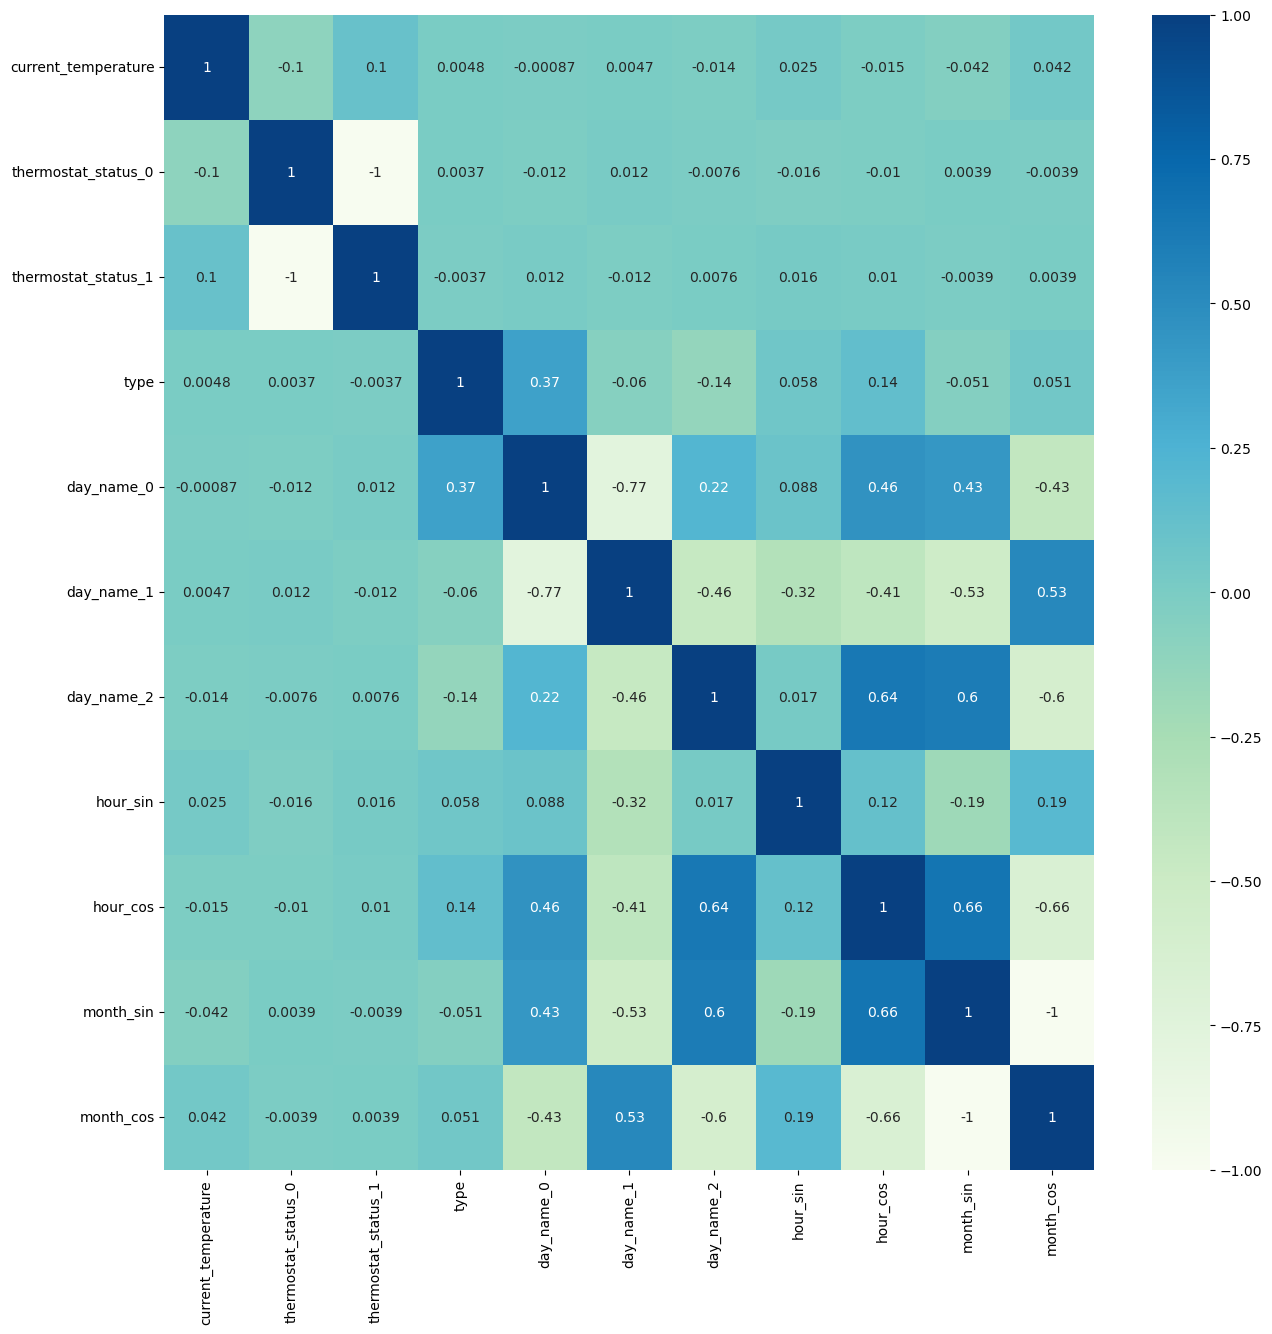

In [35]:
# multivariate analysis
plt.figure(1, figsize = (15,15))
correlation = df.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)


In [36]:
list(df.columns)

['current_temperature',
 'thermostat_status_0',
 'thermostat_status_1',
 'type',
 'day_name_0',
 'day_name_1',
 'day_name_2',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos']

In [37]:
# select and rearrange columns
df = df[['current_temperature',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos',
'thermostat_status_0',
 'thermostat_status_1',
 'day_name_0',
 'day_name_1',
 'day_name_2','type']]

In [ ]:
df

In [38]:
#numerical variables for scaling
n = df.iloc[:,:-6]

In [39]:
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(n)
robust_df = pd.DataFrame(robust_df, columns =['current_temperature',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos',])

In [40]:
robust_df

,current_temperature,hour_sin,hour_cos,month_sin,month_cos
0,0.569814,0.585786,0.196923,0.0,0.0
1,0.185485,0.585786,0.196923,0.0,0.0
2,0.467901,0.585786,0.196923,0.0,0.0
3,-0.217406,0.585786,0.196923,0.0,0.0
4,-0.637838,0.585786,0.196923,0.0,0.0
...,...,...,...,...,...
51615,-0.538211,-0.628626,-0.298858,0.0,0.0
51616,-0.565323,-0.628626,-0.298858,0.0,0.0
51617,-0.543776,-0.628626,-0.298858,0.0,0.0
51618,-0.553233,-0.628626,-0.298858,0.0,0.0


In [41]:
# extracting not scaled features (target feature + categorical features)
extracted_col= df[['thermostat_status_0',
 'thermostat_status_1',
 'day_name_0',
 'day_name_1',
 'day_name_2','type']]


In [42]:
# reset index
robust_df.reset_index(drop=True, inplace=True)
extracted_col.reset_index(drop=True, inplace=True)

In [43]:
standardized_df = robust_df.join(extracted_col)

In [44]:
standardized_df

,current_temperature,hour_sin,hour_cos,month_sin,month_cos,thermostat_status_0,thermostat_status_1,day_name_0,day_name_1,day_name_2,type
0,0.569814,0.585786,0.196923,0.0,0.0,0,1,0,0,1,1
1,0.185485,0.585786,0.196923,0.0,0.0,0,1,0,0,1,1
2,0.467901,0.585786,0.196923,0.0,0.0,0,1,0,0,1,1
3,-0.217406,0.585786,0.196923,0.0,0.0,0,1,0,0,1,1
4,-0.637838,0.585786,0.196923,0.0,0.0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
51615,-0.538211,-0.628626,-0.298858,0.0,0.0,0,1,0,1,1,2
51616,-0.565323,-0.628626,-0.298858,0.0,0.0,0,1,0,1,1,2
51617,-0.543776,-0.628626,-0.298858,0.0,0.0,0,1,0,1,1,2
51618,-0.553233,-0.628626,-0.298858,0.0,0.0,0,1,0,1,1,2


In [ ]:
df

In [45]:
from sklearn.linear_model import LassoCV
#from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold

X = standardized_df.iloc[:,:-1]
y = standardized_df["type"]

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
 
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold

X = standardized_df.iloc[:,:-1]
y = standardized_df["type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



lr = LogisticRegression(penalty='l1',C=1, solver='liblinear', class_weight='balanced', max_iter=10000, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1500
           1       1.00      1.00      1.00      1498
           2       1.00      1.00      1.00     10157
           3       1.00      1.00      1.00      1500
           4       1.00      1.00      1.00       678
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00       135

    accuracy                           1.00     15486
   macro avg       1.00      1.00      1.00     15486
weighted avg       1.00      1.00      1.00     15486



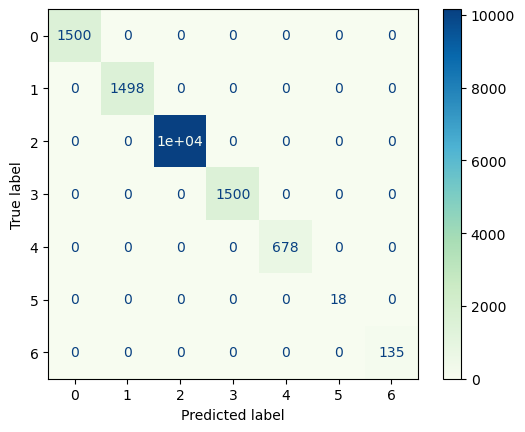

In [48]:
from sklearn import metrics

# confusion matrix
confusion_matrix = metrics.plot_confusion_matrix(lr, X_test, y_test, cmap = "GnBu")
print(confusion_matrix)

# accuracy
print(classification_report(y_test, y_pred))

In [ ]:
### 3. Model Building  ###

# split dataset
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = df.iloc[:,:-1]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# implement logistic regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter = 300)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [ ]:
### 4. Model Evaluation  ###
from sklearn import metrics

# confusion matrix
confusion_matrix = metrics.plot_confusion_matrix(reg, X_test, y_test, cmap = "GnBu")
print(confusion_matrix)

# accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



# ROC curve and AUC
y_pred_proba = reg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC:", round(auc,2))

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

In [ ]:
# recall
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

In [ ]:
# precision
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)